<h1> Robot Navigation Project </h1>

In [2]:
## referencies:
# http://vision.deis.unibo.it/~smatt/Papers/VI2002/VI2002.pdf

<h3> Libraries and Global Variables </h3>

In [3]:
f = 567.2 # focal length in pixel
b = 92.226 # base line in mm
cb_w = 125 # chessboard total width in  mm
cb_h = 178 # chessboard total height in mm
pattern_size = (6, 8) # number of inner corner, (columns, rows) of chessboard

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3> Extracting image frames from video </h3>

In [5]:
roboL = cv2.VideoCapture('./robotL.avi')
roboL_frames = []

while roboL.isOpened():
    ret, frame = roboL.read()
    if not ret:
        break
    roboL_frames = roboL_frames + [frame]

In [6]:
roboR = cv2.VideoCapture('./robotR.avi')
roboR_frames = []

while roboR.isOpened():
    ret, frame = roboR.read()
    if not ret:
        break
    roboR_frames = roboR_frames + [frame]

In [7]:
print("No. of frames for left camera : ", len(roboL_frames))
print("No of frames for right camera : ", len(roboR_frames))

No. of frames for left camera :  389
No of frames for right camera :  389


In [8]:
roboL_frames[10].shape

(480, 640, 3)

<h3> Image Processing & Histogram Analysis on single image </h3>

In [9]:
img = roboL_frames[100]

In [10]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

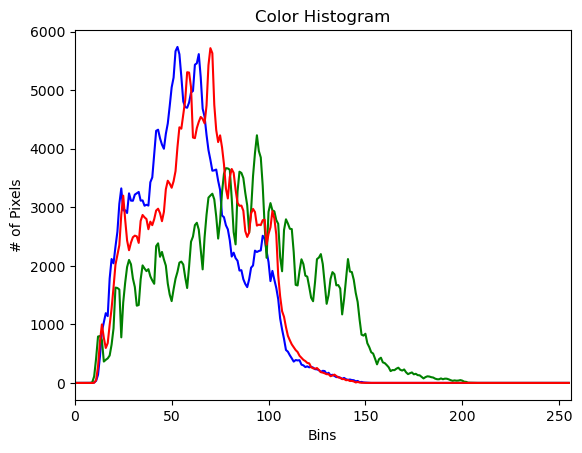

In [11]:
plot_histogram(img, 'Color Histogram')

In [12]:
img_gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

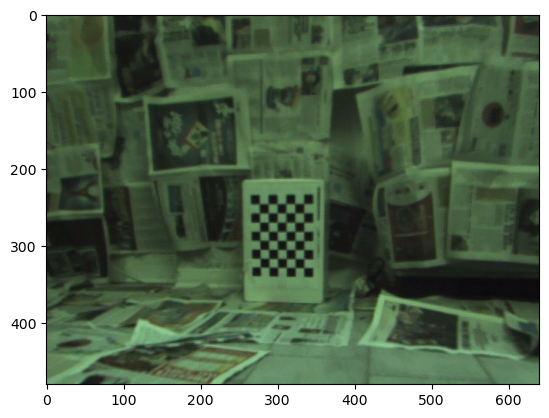

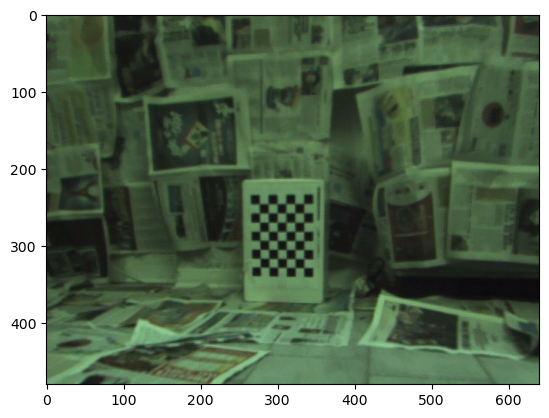

In [13]:
img_x = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_x)
plt.show()
img_x = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_x)
plt.show()

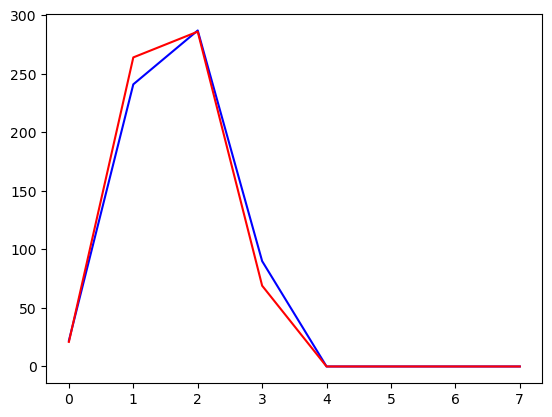

In [14]:
hist1 = cv2.calcHist(img_gray1, [0], None, [8], [0, 256])
hist2 = cv2.calcHist(img_gray2, [0], None, [8], [0, 256])
plt.plot(hist1, 'b')
plt.plot(hist2, 'r')
plt.show()

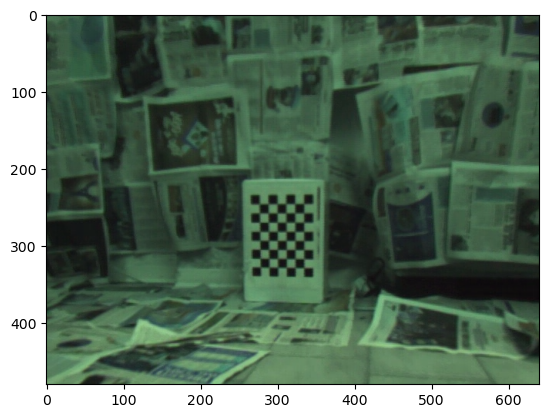

In [15]:
plt.imshow(img)
plt.show()

<h3> Detecting Chessboard Pattern (Single Image)</h3>

In [16]:
pattern_size = (6, 8) # number of inner corner, (columns, rows) for OpenCV

In [17]:
found, corners = cv2.findChessboardCorners(img_gray1, pattern_size)
print("Found: " , found)
print("2D image coordinate of corners: ", corners)

Found:  True
2D image coordinate of corners:  [[[276.77643 247.1833 ]]

 [[288.34442 246.24152]]

 [[300.23627 246.1392 ]]

 [[311.06436 245.73996]]

 [[322.5864  246.46198]]

 [[334.53333 246.01067]]

 [[277.4241  258.45352]]

 [[288.36777 258.61804]]

 [[300.2728  258.44012]]

 [[311.5822  257.81454]]

 [[322.94647 258.50693]]

 [[334.7256  258.35684]]

 [[277.58463 270.1731 ]]

 [[288.76236 270.2757 ]]

 [[300.45737 270.48715]]

 [[311.70044 270.52765]]

 [[322.75998 270.51468]]

 [[334.67145 270.61746]]

 [[277.97617 282.36536]]

 [[288.80505 282.58575]]

 [[300.47955 281.97552]]

 [[311.71667 282.5574 ]]

 [[322.92142 282.3305 ]]

 [[334.5188  282.42157]]

 [[278.094   293.49518]]

 [[289.37146 293.67734]]

 [[300.1503  293.78873]]

 [[311.84204 293.9367 ]]

 [[323.49518 294.0064 ]]

 [[334.5832  294.02924]]

 [[278.02307 305.50446]]

 [[289.44888 305.51715]]

 [[300.4255  305.6942 ]]

 [[312.06424 305.9823 ]]

 [[323.64902 306.12842]]

 [[334.71533 306.0364 ]]

 [[277.6871  317.4

In [18]:
# Do cornerSubPix only if chessboard found is True
if found:
    #Refining corner position to subpixel iteratively until criteria max_count=30 or criteria_eps_error=1 is sutisfied
    term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 1)
    #Image Corners 
    cv2.cornerSubPix(img_gray1, corners, (5, 5), (-1, -1), term)

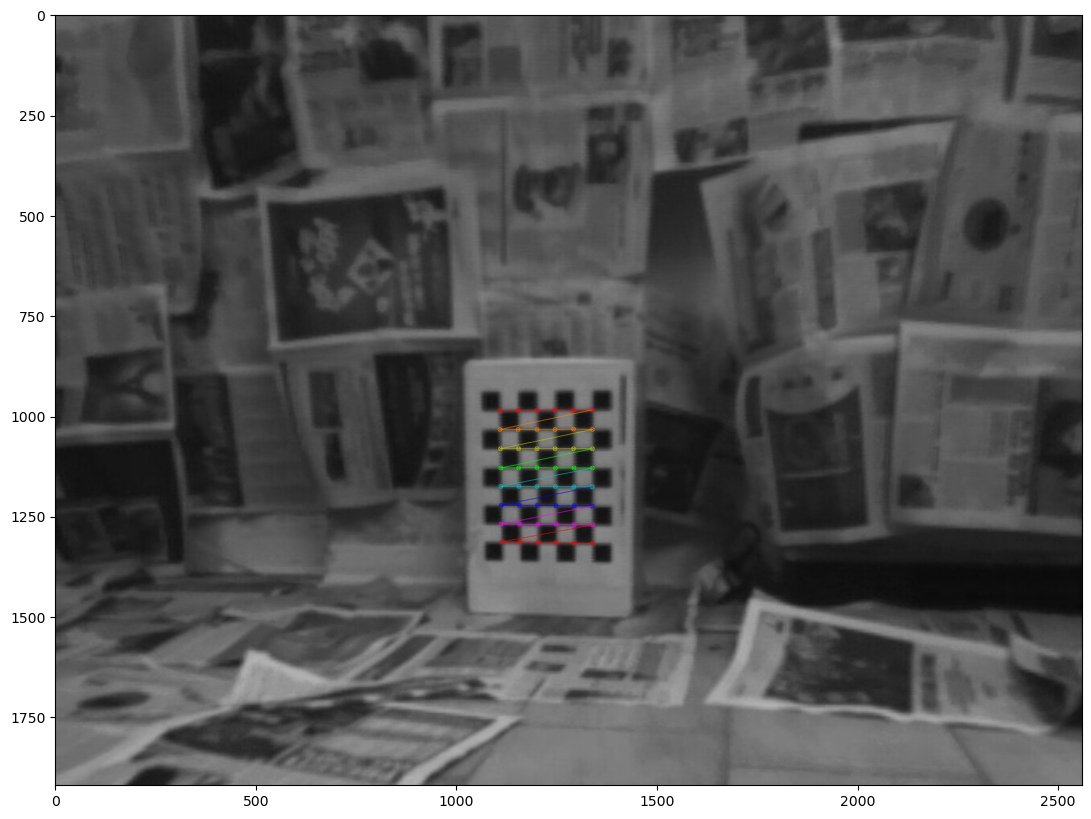

In [19]:
vis = cv2.cvtColor(img_gray1, cv2.COLOR_GRAY2BGR)
vis = cv2.resize(vis,None,fx=4, fy=4)
cv2.drawChessboardCorners(vis, pattern_size, corners*4, found)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.show()

<h3> Converting to NumPy Array </h3>

In [20]:
np_L = np.array(roboL_frames)
np_R = np.array(roboR_frames)

In [21]:
np_L.shape

(389, 480, 640, 3)

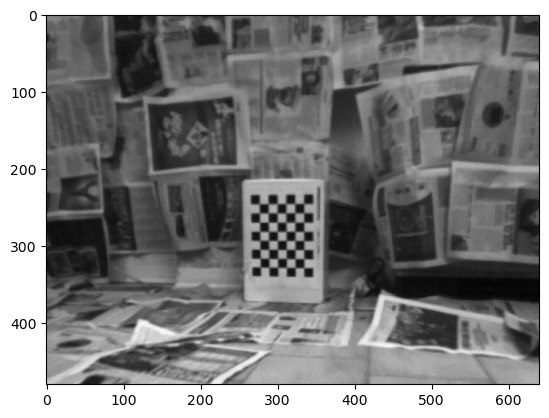

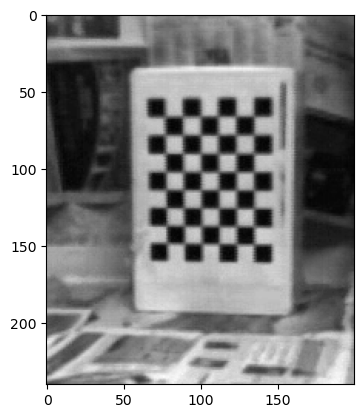

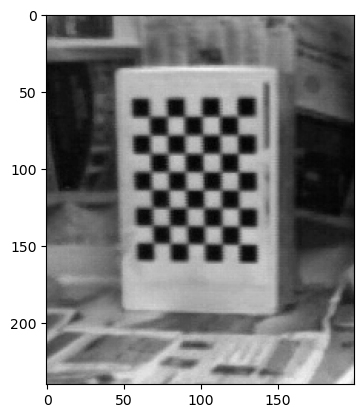

(389, 480, 640)

In [42]:
np_L_gray = np.array([cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) for frame in np_L])
np_R_gray = np.array([cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) for frame in np_R])
framenumber = 100

np_L_cropped=np_L_gray[framenumber,180:420,200:400]
np_R_cropped=np_R_gray[framenumber,180:420,170:370]

# Display the images
plt.imshow(np_L_gray[framenumber], cmap='gray')
plt.show()
# plt.imshow(np_R_gray[framenumber], cmap='gray')
# plt.show()
plt.imshow(np_L_cropped, cmap='gray')
plt.show()
plt.imshow(np_R_cropped, cmap='gray')
plt.show()

np_L_gray.shape

In [43]:
# 1. stereo_matching
# Purpose:

# This function performs stereo matching on a pair of left and right frames using the Sum of Absolute Differences (SAD) dissimilarity measure. It computes the dense disparity map, which represents the pixel-wise differences between the left and right images.
# Parameters:

#    left_frame: The left camera frame.
#    right_frame: The right camera frame.
#    window_size: Size of the matching window.
#    disparity_range: Range of possible disparities.

# Output:

#    disparity_map: The dense disparity map representing the depth information of the scene.

# 1. minDisparity:

#     Definition: The minimum possible disparity value. Adjusting this parameter can help account for any systematic error in the stereo system.
#     Tuning Steps:
#         Start with a value of 0.
#         If the disparity map seems shifted to the left or right, try adjusting minDisparity accordingly.
#         Increment or decrement in small steps until the disparity map aligns well with the scene.

# 2. numDisparities:

#     Definition: The number of disparities. It represents the disparity search range.
#     Tuning Steps:
#         Set an initial value based on the expected range of disparities in your scene.
#         If the disparity map lacks details or has artifacts, consider increasing numDisparities.
#         Conversely, if the map is too noisy or contains outliers, try reducing numDisparities.

# 3. blockSize:

#     Definition: The size of the pixel neighborhood used for stereo matching.
#     Tuning Steps:
#         Start with a small size, e.g., 3 or 5.
#         Increase the size for smoother disparity maps.
#         Smaller sizes might capture finer details but can be sensitive to noise.
#         Evaluate the impact on the quality of the disparity map.


def stereo_matching(left_gray, right_gray, window_size=5, disparity_range=128):
    # Compute disparity map using SAD (sum of absolute differences)
    # StereoSGBM algorithm from OpenCV to compute the dense disparity map.
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,                  # Minimum possible disparity value
        numDisparities=disparity_range,   # Range of disparity (maxDisparity - minDisparity)
        blockSize=window_size,           # Size of the window used for matching (odd values only)
        P1=8 * 3 * window_size ** 2,      # Penalty for the first pixel disparity difference
        P2=32 * 3 * window_size ** 2,     # Penalty for the second pixel disparity difference
        disp12MaxDiff=1,                  # Maximum allowed difference in the left-right disparity check
        uniquenessRatio=10,              # Margin in percentage by which the best (minimum) computed cost function value should "win"
        speckleWindowSize=10,           # Maximum size of smooth disparity regions to consider them as a speckle
        speckleRange=32,                  # Maximum disparity variation within each connected component
    )


    disparity_map = stereo.compute(left_gray, right_gray)

    return disparity_map

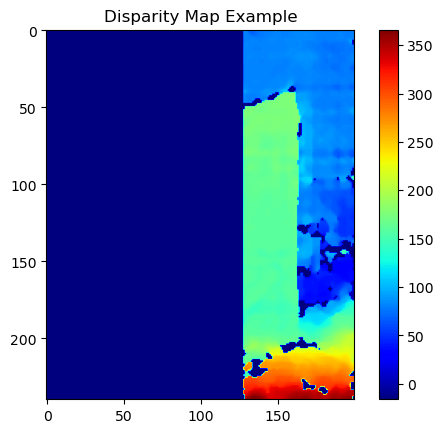

In [44]:
#disparity_map_example = stereo_matching(np_L_gray[100], np_R_gray[100])
disparity_map_example = stereo_matching(np_L_cropped,np_R_cropped)
plt.imshow(disparity_map_example, cmap='jet')
plt.colorbar()
plt.title('Disparity Map Example')
plt.show()

In [220]:
#Purpose:

# This function focuses on a central area of the reference frame and computes the dense disparity map within that region using the stereo matching algorithm. It extracts a square region from the center of the frames.
# Parameters:

#    left_frame: The left camera frame.
#    right_frame: The right camera frame.
#    window_size: Size of the matching window.
#    disparity_range: Range of possible disparities.
#    central_size: Size of the central square region.

# Output:

#     disparity_map: The dense disparity map for the central area.

def compute_central_disparity(left_frame, right_frame, window_size=5, disparity_range=128, central_size=80):
    
    # Extract central area from the frames
    center_x = left_frame.shape[1] // 2
    center_y = right_frame.shape[0] // 2
    central_left = left_frame[center_y - central_size // 2: center_y + central_size // 2,
                             center_x - central_size // 2: center_x + central_size // 2]
    central_right = right_frame[center_y - central_size // 2: center_y + central_size // 2,
                               center_x - central_size // 2: center_x + central_size // 2]

    # Compute dense disparity map in the central area
    disparity_map = stereo_matching(central_left, central_right, window_size, disparity_range)

    return disparity_map


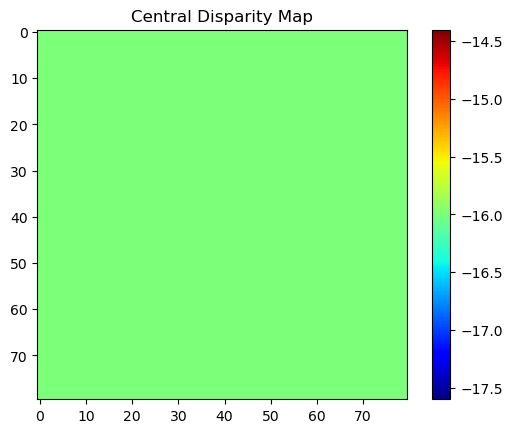

In [221]:
central_disparity_map_example = compute_central_disparity(np_L_gray[100],np_R_gray[100])
plt.imshow(central_disparity_map_example, cmap='jet')
plt.colorbar()
plt.title('Central Disparity Map')
plt.show()

In [222]:
# 3. estimate_main_disparity
# Purpose:

# This function estimates the main disparity for the frontal portion of the environment based on the disparity map of the central area. It can use methods such as averaging or finding the most frequent disparity value within the map.
# Parameters:

#     central_disparity_map: The dense disparity map for the central area.

# Output:

#     main_disparity: The estimated main disparity value.

def estimate_main_disparity(central_disparity_map):
    # Choose your method to estimate the main disparity
    # For example, you can use the average disparity
    main_disparity = np.mean(central_disparity_map)

    return main_disparity

In [223]:
main_disparity_example = estimate_main_disparity(central_disparity_map_example)
print(f"Estimated Main Disparity: {main_disparity_example}")

Estimated Main Disparity: -16.0


In [224]:
# 4. determine_distance
# Purpose:

# This function calculates the distance to an obstacle in front of the vehicle based on the estimated main disparity. It uses the stereo vision principle and the provided formula.
# Parameters:

#     main_disparity: The estimated main disparity value.
#     focal_length: Focal length of the camera (default is the global variable f).
#     baseline: Baseline between the stereo cameras (default is the global variable b).

# Output:

#     distance_m: The estimated distance to the obstacle in meters.

def determine_distance(main_disparity, focal_length=f, baseline=b):
    if main_disparity <= 0:
        print("Error: Invalid main disparity value")
        return None

    distance_mm = (baseline * focal_length) / main_disparity
    distance_m = distance_mm / 1000  # Convert to meters

    if distance_m < 0:
        print("Error: Negative distance value")
        return None

    return distance_m


In [225]:
distance_example = determine_distance(main_disparity_example)
print(f"Estimated Distance to Obstacle: {distance_example} meters")

Error: Invalid main disparity value
Estimated Distance to Obstacle: None meters
